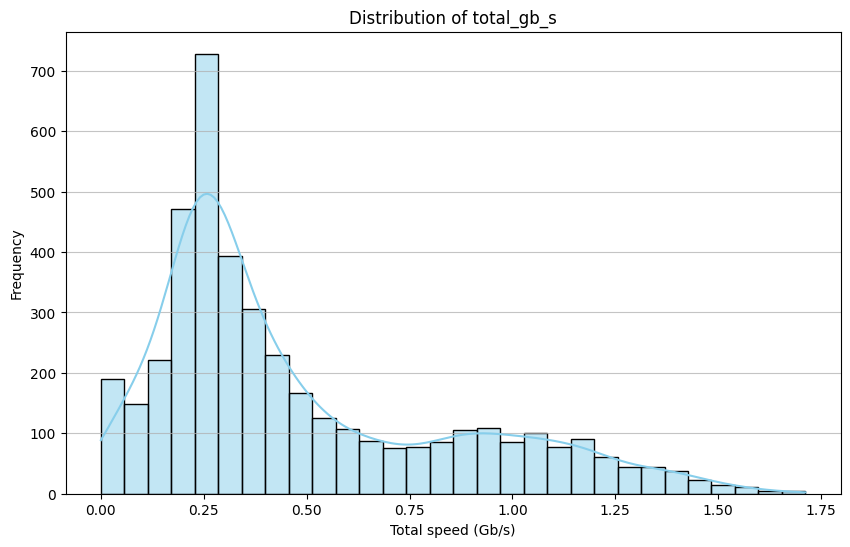

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

class NET_LSTM:
    
    @classmethod
    def load_and_preprocess_data(cls, file_path: str):
        """
        Load data from a csv file
        :param file_path: path to the csv file
        :return: a pandas dataframe
        """
        df = pd.read_csv(file_path)
        # Clean column names
        df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
        # Convert to datetime
        df['time'] = pd.to_datetime(df['time'])
        # Convert b/s to Gb/s for relevant columns
        df['download_gb_s'] = df['download_b/s'] / (10**9)
        df['total_gb_s'] = df['total_b/s'] / (10**9)
        return df

    @staticmethod
    def plot_distribution(df: pd.DataFrame, column: str, xlabel: str = 'Total speed (Gb/s)'):
        """
        Plot a histogram of the specified column.
        :param df: a pandas dataframe
        :param column: the column to plot
        :return: None
        """
        plt.figure(figsize=(10, 6))
        sns.histplot(
            df[column],
            bins=30,
            kde=True, 
            color='skyblue',
            edgecolor='black'
        )
        plt.title(f'Distribution of {column}')
        plt.xlabel(xlabel)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

    @staticmethod
    def scale_data(df: pd.DataFrame, columns: list):
        """
        Scale the specified columns of the dataframe
        """
        scaler = MinMaxScaler(feature_range=(0, 1))
        df_scaled = df.copy()
        df_scaled[columns] = scaler.fit_transform(df[columns])
        return df_scaled, scaler
    
    @staticmethod
    def create_sequences(df: pd.DataFrame, n_steps: int):
        """
        Create sequences
        :param df: a pandas dataframe
        :param n_steps: the number of steps
        :return: a tuple of numpy arrays
        """
        X, y = [], []
        for i in range(len(df) - n_steps):
            sequence = df[i:i + n_steps]
            target = df[i + n_steps]
            X.append(sequence)
            y.append(target)
        return np.array(X), np.array(y)
    
    @staticmethod
    def create_sequences_with_timestamps(df: pd.DataFrame, n_steps: int, target_column: str):
        X, y, timestamps = [], [], []
        for i in range(n_steps, len(df)):
            X.append(df.iloc[i-n_steps:i][['download_gb_s', 'total_gb_s']].values)
            y.append(df.iloc[i][target_column])
            timestamps.append(df.iloc[i]['time'])  # Store the timestamp
        return np.array(X), np.array(y), np.array(timestamps)
    
    

# Load and preprocess data
file_path = './outup/usage_over_time.csv'
df = NET_LSTM.load_and_preprocess_data(file_path)

# Scale the data
columns_to_scale = ['download_gb_s', 'total_gb_s']
df_scaled, scaler = NET_LSTM.scale_data(df, columns_to_scale)  # Scale the data

# Visualize the distribution of the total speed (Gb/s)
NET_LSTM.plot_distribution(df, 'total_gb_s')  # Plot histogram


df.index = df['time']

time_series = df.index # Extract time series

df['hour'] = df.index.hour  # Extract hour of the day (0-23)
df['day_of_week'] = df.index.dayofweek  # Extract day of the week (0=Monday, 6=Sunday)
df['day_of_month'] = df.index.day  # Extract day of the month (1-31)
df['month'] = df.index.month  # Extract month of the year

ValueError: Could not interpret value `Hour` for `x`. An entry with this name does not appear in `data`.

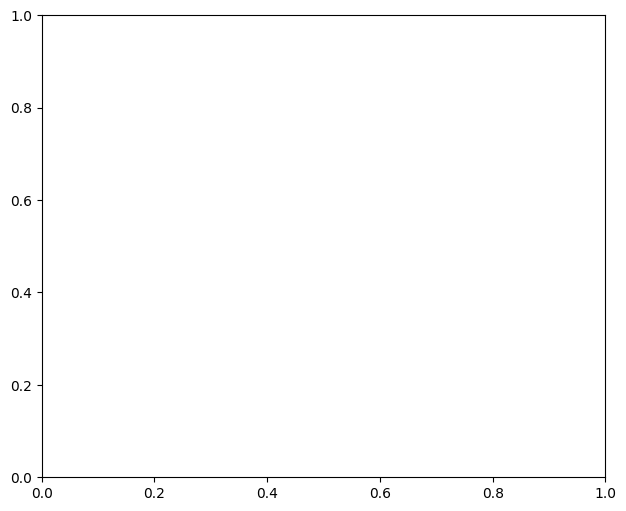

In [2]:
plt.figure(figsize=(16, 6))
# Graphical representation of the distribution of the total network usage by hour of the day
plt.subplot(1, 2, 1)
sns.boxplot(x='Hour', y='Total (Gb/s)', data=df)
plt.title('Distribución del Uso Total de la Red por Hora del Día')

# Graphical representation of the distribution of the total network usage by day of the week
plt.subplot(1, 2, 2)
sns.boxplot(x='Day of Week', y='Total (Gb/s)', data=df)
plt.title('Distribución del Uso Total de la Red por Día de la Semana')

plt.tight_layout()
plt.show()

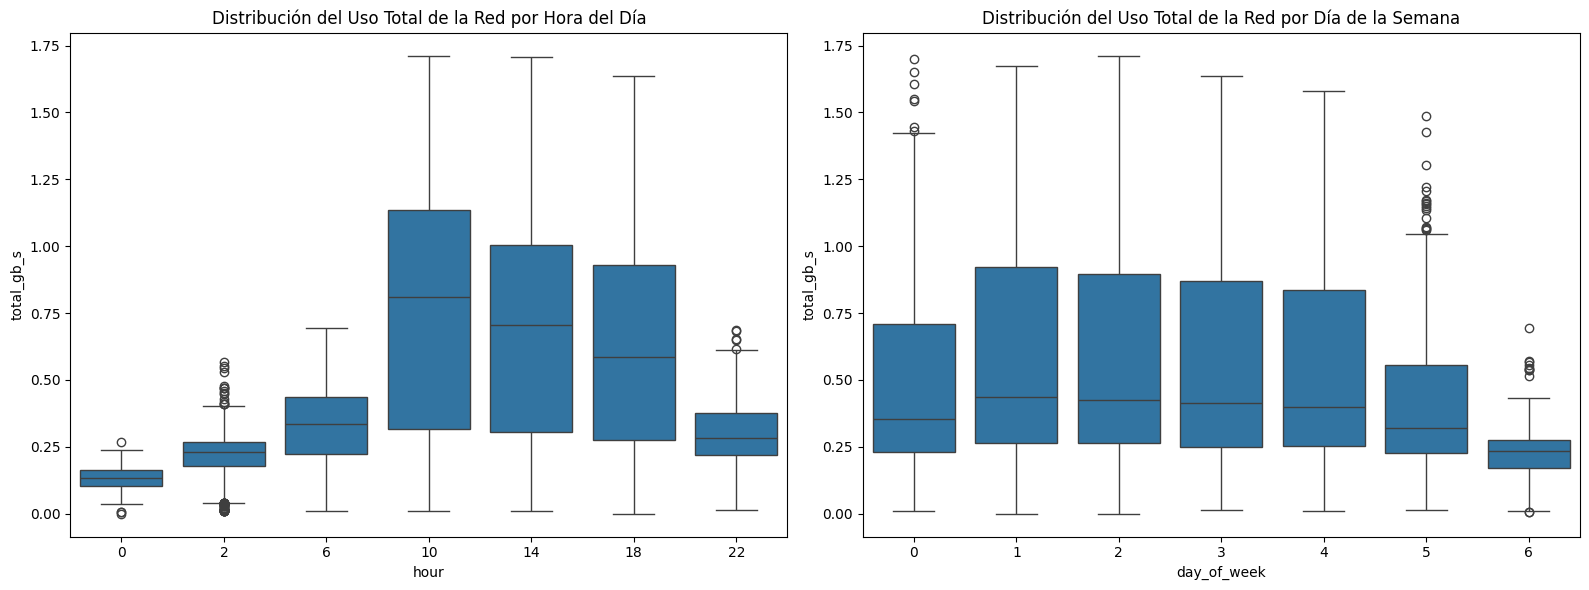

In [3]:
plt.figure(figsize=(16, 6))
# Graphical representation of the distribution of the total network usage by hour of the day
plt.subplot(1, 2, 1)
sns.boxplot(x='hour', y='total_gb_s', data=df)
plt.title('Distribución del Uso Total de la Red por Hora del Día')

# Graphical representation of the distribution of the total network usage by day of the week
plt.subplot(1, 2, 2)
sns.boxplot(x='day_of_week', y='total_gb_s', data=df)
plt.title('Distribución del Uso Total de la Red por Día de la Semana')

plt.tight_layout()
plt.show()

In [4]:
sns.set(style="whitegrid")

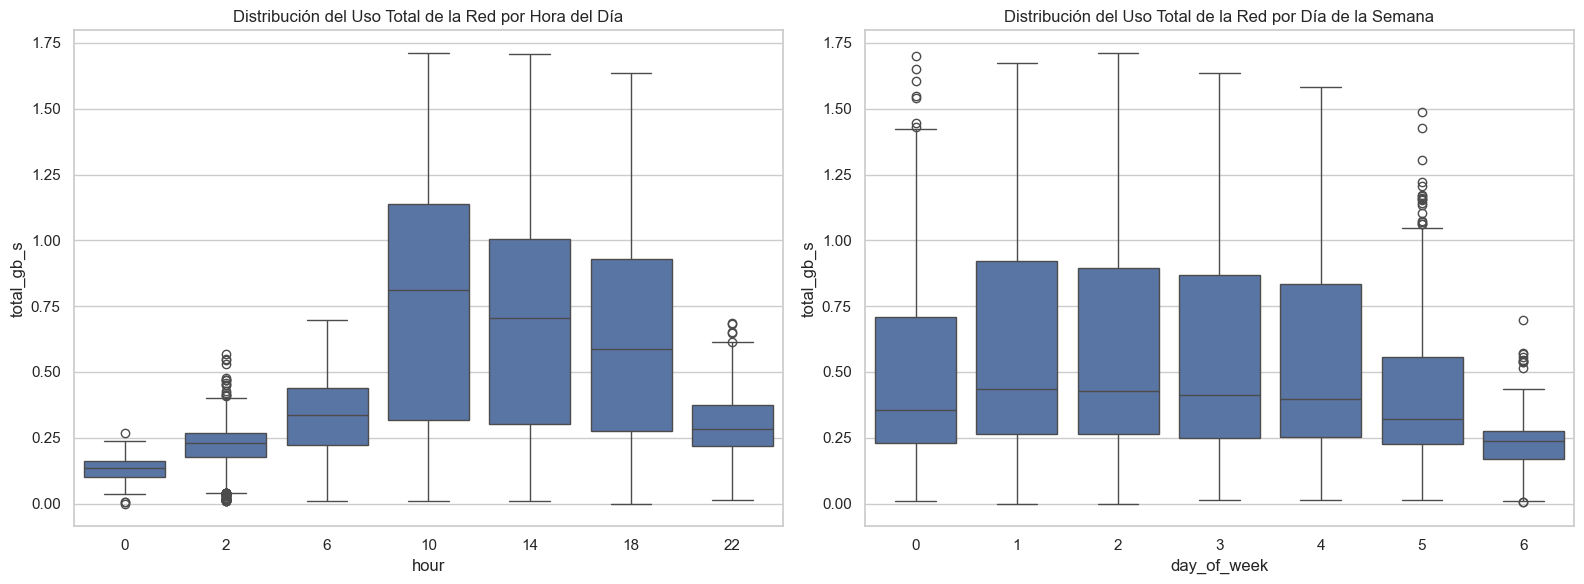

In [5]:
plt.figure(figsize=(16, 6))
# Graphical representation of the distribution of the total network usage by hour of the day
plt.subplot(1, 2, 1)
sns.boxplot(x='hour', y='total_gb_s', data=df)
plt.title('Distribución del Uso Total de la Red por Hora del Día')

# Graphical representation of the distribution of the total network usage by day of the week
plt.subplot(1, 2, 2)
sns.boxplot(x='day_of_week', y='total_gb_s', data=df)
plt.title('Distribución del Uso Total de la Red por Día de la Semana')

plt.tight_layout()
plt.show()

<ipython-input-6-1daef263450c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='total_gb_s', data=df, palette='viridis')


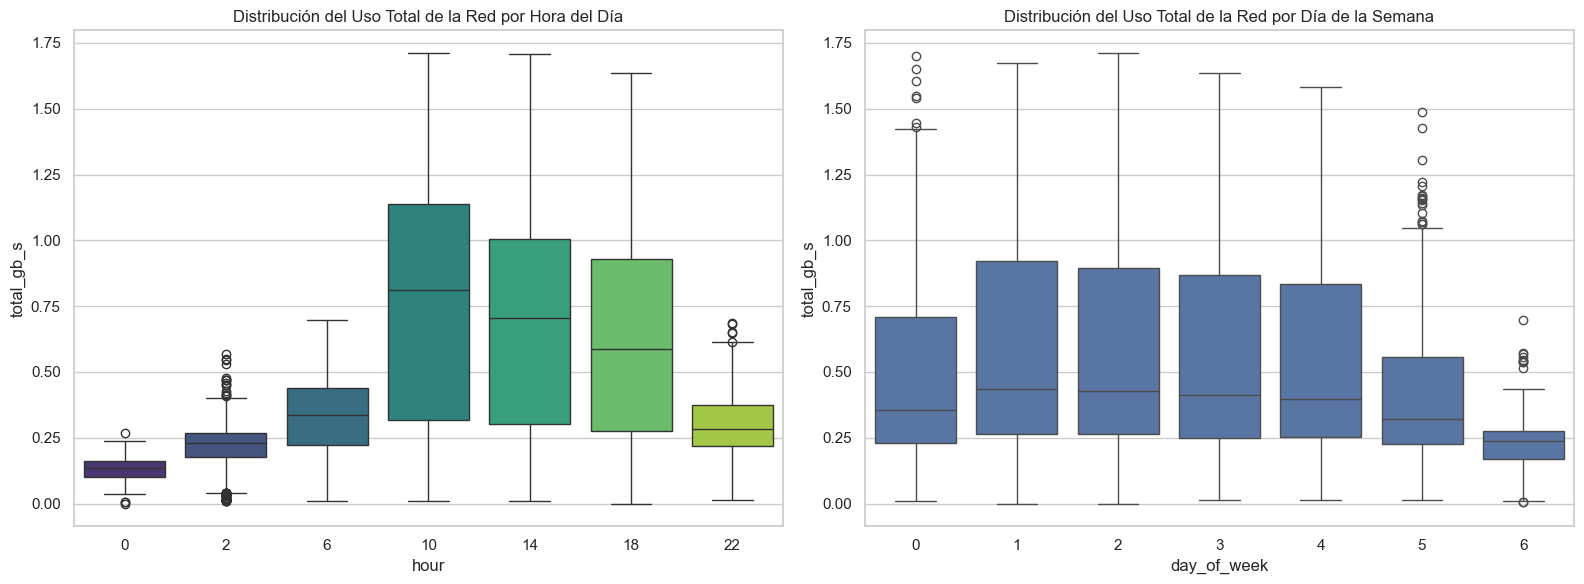

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
# Graphical representation of the distribution of the total network usage by hour of the day
plt.subplot(1, 2, 1)
sns.boxplot(x='hour', y='total_gb_s', data=df, palette='viridis')
plt.title('Distribución del Uso Total de la Red por Hora del Día')

# Graphical representation of the distribution of the total network usage by day of the week
plt.subplot(1, 2, 2)
sns.boxplot(x='day_of_week', y='total_gb_s', data=df)
plt.title('Distribución del Uso Total de la Red por Día de la Semana')

plt.tight_layout()
plt.show()

<ipython-input-7-98cc96cd12e6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y='total_gb_s', data=df, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

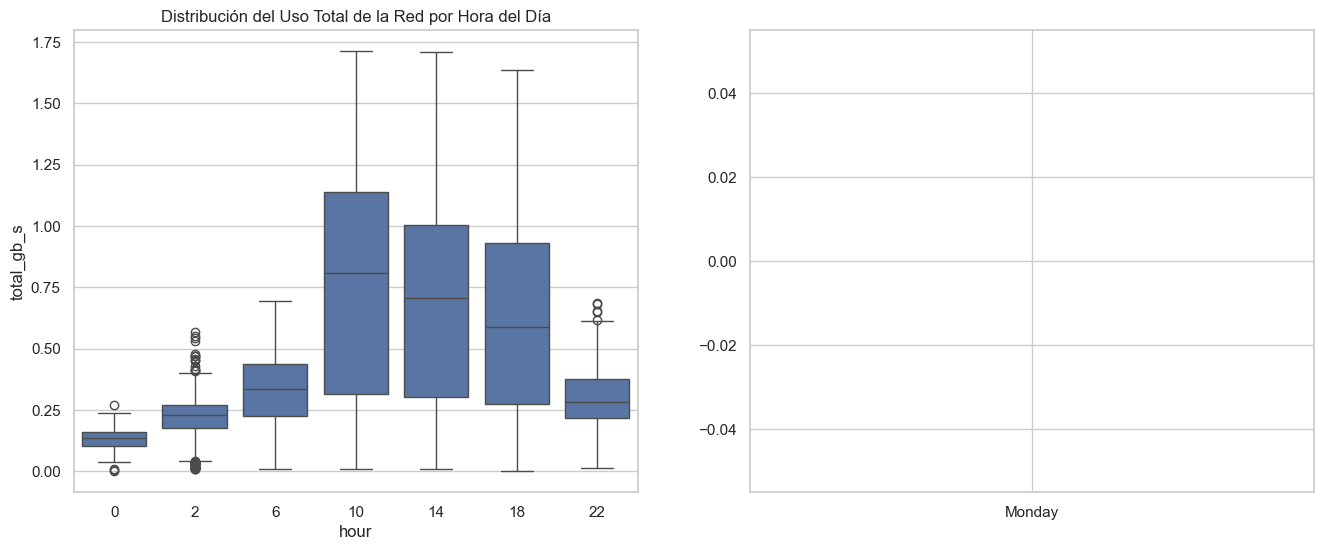

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
# Graphical representation of the distribution of the total network usage by hour of the day
plt.subplot(1, 2, 1)
sns.boxplot(x='hour', y='total_gb_s', data=df)
plt.title('Distribución del Uso Total de la Red por Hora del Día')

# Graphical representation of the distribution of the total network usage by day of the week
plt.subplot(1, 2, 2)
sns.boxplot(x='day_of_week', y='total_gb_s', data=df, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribución del Uso Total de la Red por Día de la Semana')

plt.tight_layout()
plt.show()

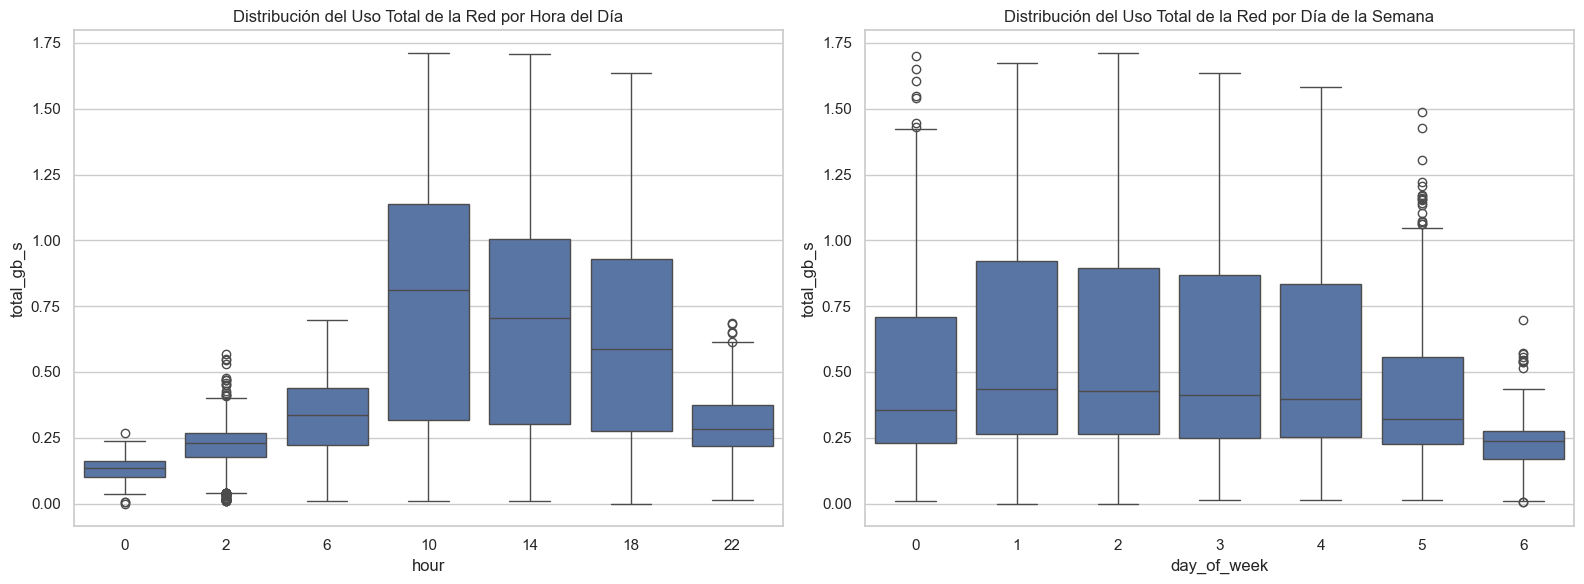

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
# Graphical representation of the distribution of the total network usage by hour of the day
plt.subplot(1, 2, 1)
sns.boxplot(x='hour', y='total_gb_s', data=df)
plt.title('Distribución del Uso Total de la Red por Hora del Día')

# Graphical representation of the distribution of the total network usage by day of the week
plt.subplot(1, 2, 2)
sns.boxplot(x='day_of_week', y='total_gb_s', data=df)
plt.title('Distribución del Uso Total de la Red por Día de la Semana')

plt.tight_layout()
plt.show()

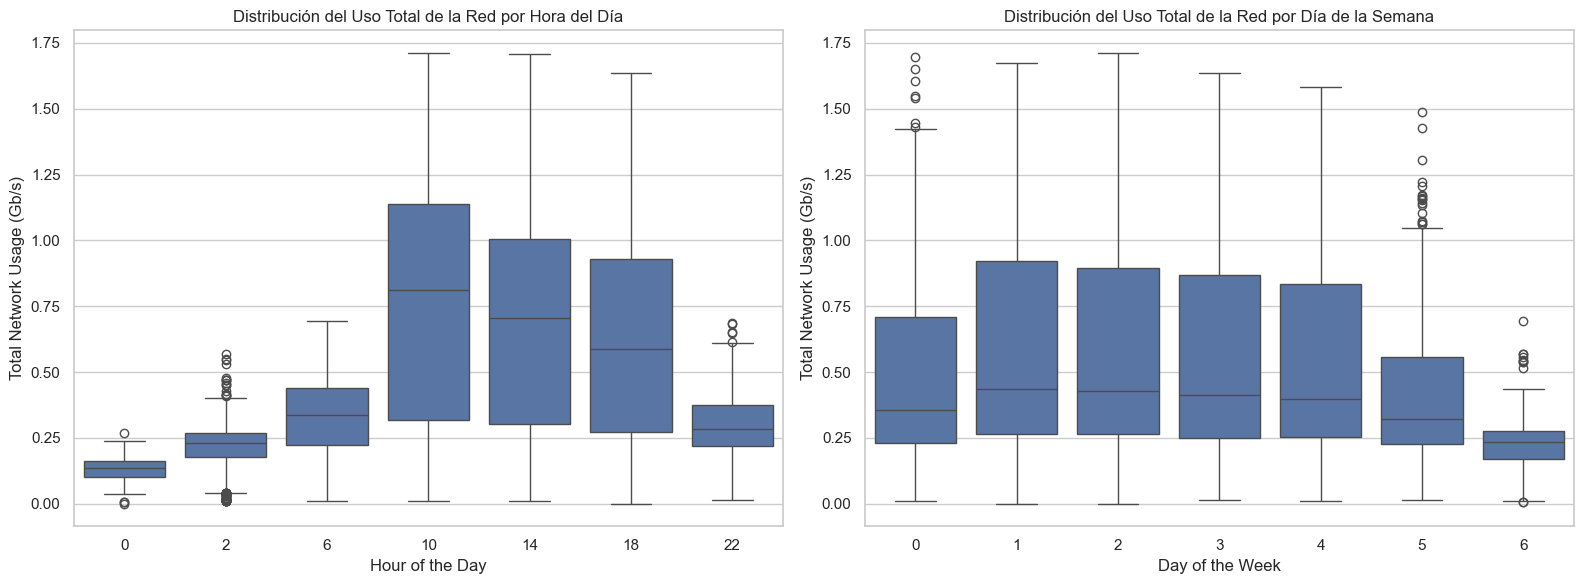

In [9]:
plt.figure(figsize=(16, 6))
# Graphical representation of the distribution of the total network usage by hour of the day
plt.subplot(1, 2, 1)
sns.boxplot(x='hour', y='total_gb_s', data=df,)
plt.title('Distribución del Uso Total de la Red por Hora del Día')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Network Usage (Gb/s)')

# Graphical representation of the distribution of the total network usage by day of the week
plt.subplot(1, 2, 2)
sns.boxplot(x='day_of_week', y='total_gb_s', data=df)
plt.title('Distribución del Uso Total de la Red por Día de la Semana')
plt.xlabel('Day of the Week')
plt.ylabel('Total Network Usage (Gb/s)')

plt.tight_layout()
plt.show()

In [10]:
df.head()

,time,download_b/s,total_b/s,download_gb_s,total_gb_s,hour,day_of_week,day_of_month,month
time,,,,,,,,,
2022-02-01 00:00:00+00:00,2022-02-01 00:00:00+00:00,0.000000e+00,0.000000e+00,0.000000,0.000000,0,1,1,2
2022-02-02 18:00:00+00:00,2022-02-02 18:00:00+00:00,0.000000e+00,0.000000e+00,0.000000,0.000000,18,2,2,2
2022-02-02 22:00:00+00:00,2022-02-02 22:00:00+00:00,2.159972e+08,4.335945e+08,0.215997,0.433595,22,2,2,2
2022-02-03 02:00:00+00:00,2022-02-03 02:00:00+00:00,1.040372e+08,2.080813e+08,0.104037,0.208081,2,3,3,2
2022-02-03 06:00:00+00:00,2022-02-03 06:00:00+00:00,1.688578e+08,3.405690e+08,0.168858,0.340569,6,3,3,2


In [11]:
required_cols = ['download_gb_s', 'total_gb_s', 'hour', 'day_of_week', 'day_of_month', 'month']
df = df[required_cols]
df.head()

,download_gb_s,total_gb_s,hour,day_of_week,day_of_month,month
time,,,,,,
2022-02-01 00:00:00+00:00,0.000000,0.000000,0,1,1,2
2022-02-02 18:00:00+00:00,0.000000,0.000000,18,2,2,2
2022-02-02 22:00:00+00:00,0.215997,0.433595,22,2,2,2
2022-02-03 02:00:00+00:00,0.104037,0.208081,2,3,3,2
2022-02-03 06:00:00+00:00,0.168858,0.340569,6,3,3,2


In [12]:
df.isna().sum()
df = df.ffill()  # Fill missing values

In [13]:
n_steps = 42  # Number of time steps based on 7 days (24h/4h = 6 * 7d = 42)
# Create sequences (Divide the data into input and target)
X, y, timestamps = NET_LSTM.create_sequences_with_timestamps(df_scaled, n_steps, 'total_gb_s')

train_size = int(len(X) * 0.7)  # 70% train, 20% validation, 10% test
val_size = int(len(X) * 0.2)

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]
timestamps_test = timestamps[train_size + val_size:] # Store the timestamps for the test set

# X_train.shape, X_val.shape, X_test.shape
# y_train.shape, y_val.shape, y_test.shape

n_features = X_train.shape[2]  # Number of features

# Build the model
model = Sequential([
    Input(shape=(n_steps, n_features)),
    LSTM(100, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 42, 100)        │        41,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 42, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,451 (279.11 KB)

 Trainable params: 71,451 (279.11 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
## Define callbacks

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True
)

# Model checkpoint
model_checkpoint = ModelCheckpoint(
    'best_model1.keras',
    monitor='val_loss',
    save_best_only=True,
    # save_weights_only=False,
    # mode='min'
)

In [15]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0594 - val_loss: 0.0595
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0384 - val_loss: 0.0560
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0378 - val_loss: 0.0556
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0356 - val_loss: 0.0570
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0387 - val_loss: 0.0555
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0356 - val_loss: 0.0565
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0363 - val_loss: 0.0532
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0354 - val_loss: 0.0519
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0348 - val_loss: 0.0535
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0348 - val_loss: 0.0500
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0337 - val_loss: 0.0456
Epoch 12/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

In [16]:
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


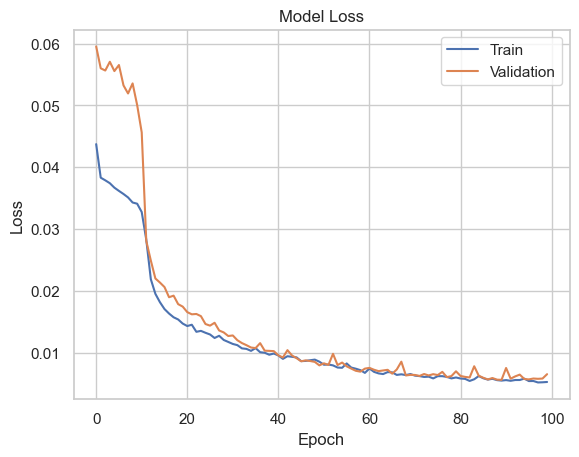

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [18]:
# Calculate and pritn error metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mae) # Correct RMSE calculation

print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)

Mean Absolute Error 0.029797718284547258
Mean Squared Error 0.002388997440464474
Root Mean Squared Error 0.17262015607844658


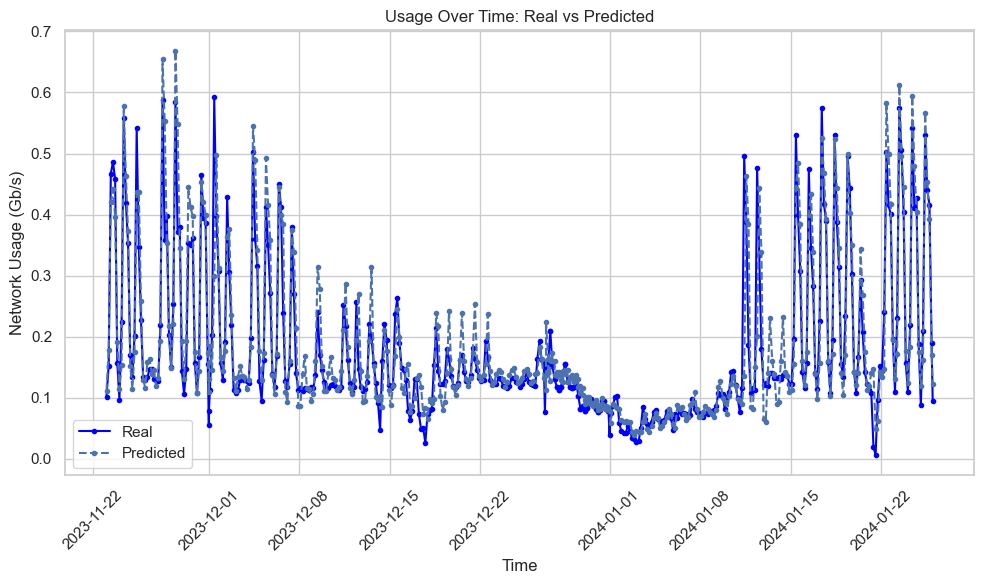

In [19]:
# Visualization of the Predictions vs Real Values
plt.figure(figsize=(10, 6))
plt.plot(timestamps_test, y_test, label='Real', color='blue', marker='.')
plt.plot(timestamps_test, predictions.flatten(), label='Predicted', linestyle='--', marker='.')
plt.title('Usage Over Time: Real vs Predicted')
plt.xlabel('Time')
plt.ylabel('Network Usage (Gb/s)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Ensure the labels fit within the figure area
plt.show()

ValueError: x and y must have same first dimension, but have shapes (42,) and (419,)

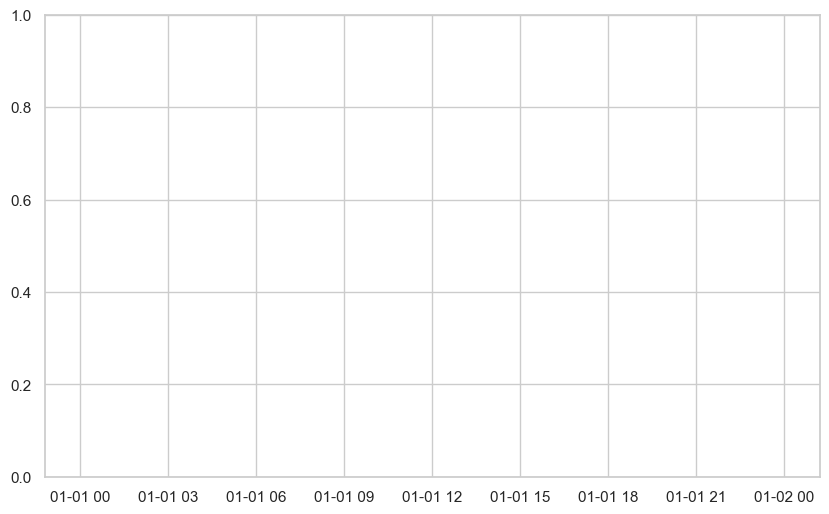

In [20]:
# Visualization of the Predictions vs Real Values
plt.figure(figsize=(10, 6))
plt.plot(timestamps_test[-42:], y_test, label='Real', color='blue', marker='.')
plt.plot(timestamps_test[-42:], predictions[-42:], label='Predicted', linestyle='--', marker='.')
plt.title('Usage Over Time: Real vs Predicted')
plt.xlabel('Time')
plt.ylabel('Network Usage (Gb/s)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Ensure the labels fit within the figure area
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (419,)

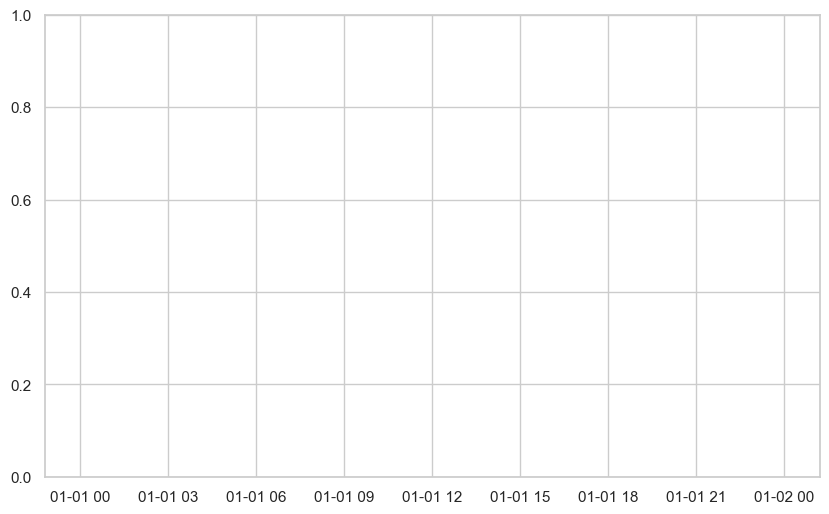

In [21]:
# Visualization of the Predictions vs Real Values
plt.figure(figsize=(10, 6))
plt.plot(timestamps_test[-100:], y_test, label='Real', color='blue', marker='.')
plt.plot(timestamps_test[-100:], predictions[-42:], label='Predicted', linestyle='--', marker='.')
plt.title('Usage Over Time: Real vs Predicted')
plt.xlabel('Time')
plt.ylabel('Network Usage (Gb/s)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Ensure the labels fit within the figure area
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (419,)

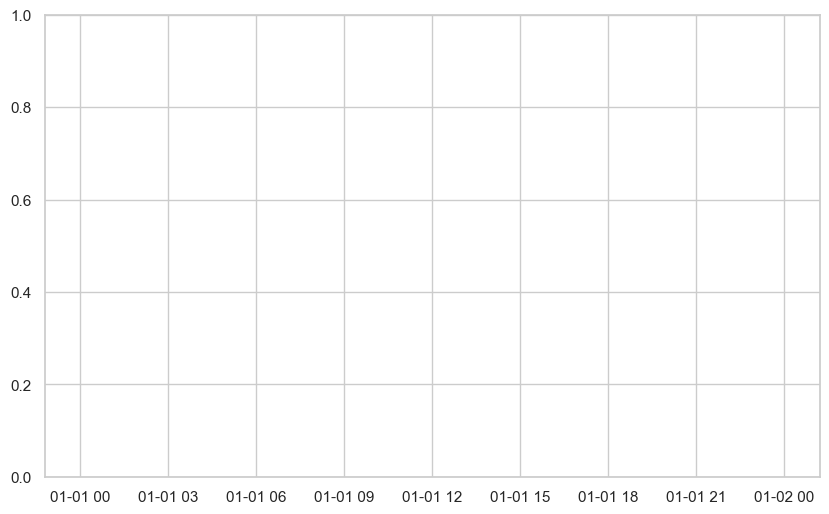

In [22]:
# Visualization of the Predictions vs Real Values
plt.figure(figsize=(10, 6))
plt.plot(timestamps_test[-100:], y_test, label='Real', color='blue', marker='.')
plt.plot(timestamps_test[-100:], predictions[-100:], label='Predicted', linestyle='--', marker='.')
plt.title('Usage Over Time: Real vs Predicted')
plt.xlabel('Time')
plt.ylabel('Network Usage (Gb/s)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Ensure the labels fit within the figure area
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (419,)

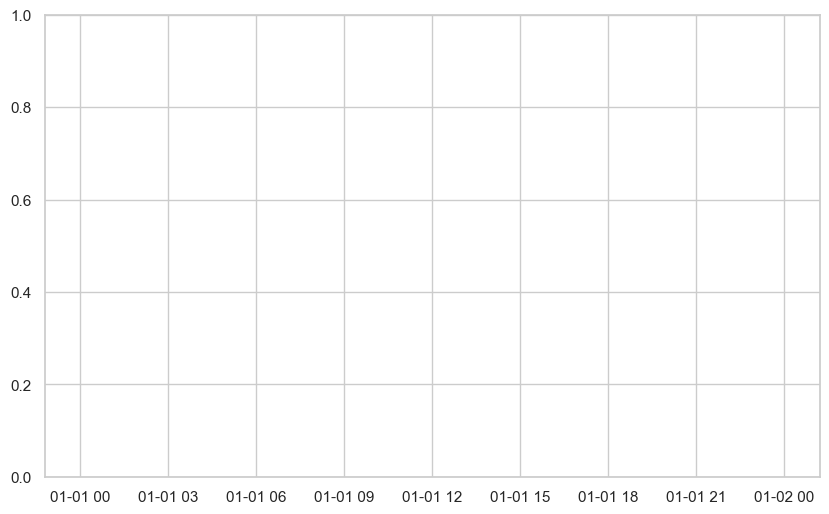

In [23]:
# Visualization of the Predictions vs Real Values
plt.figure(figsize=(10, 6))
plt.plot(timestamps_test[-100:], y_test, label='Real', marker='.')
plt.plot(timestamps_test[-100:], predictions[-100:], label='Predicted', linestyle='--', marker='.')
plt.title('Usage Over Time: Real vs Predicted')
plt.xlabel('Time')
plt.ylabel('Network Usage (Gb/s)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Ensure the labels fit within the figure area
plt.show()

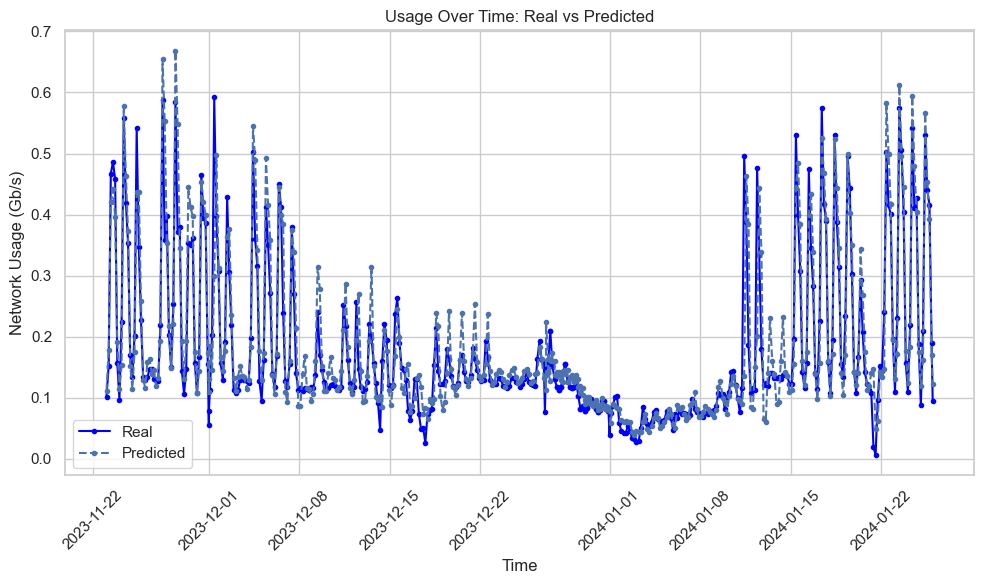

In [24]:
# Visualization of the Predictions vs Real Values
plt.figure(figsize=(10, 6))
plt.plot(timestamps_test, y_test, label='Real', color='blue', marker='.')
plt.plot(timestamps_test, predictions.flatten(), label='Predicted', linestyle='--', marker='.')
plt.title('Usage Over Time: Real vs Predicted')
plt.xlabel('Time')
plt.ylabel('Network Usage (Gb/s)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Ensure the labels fit within the figure area
plt.show()

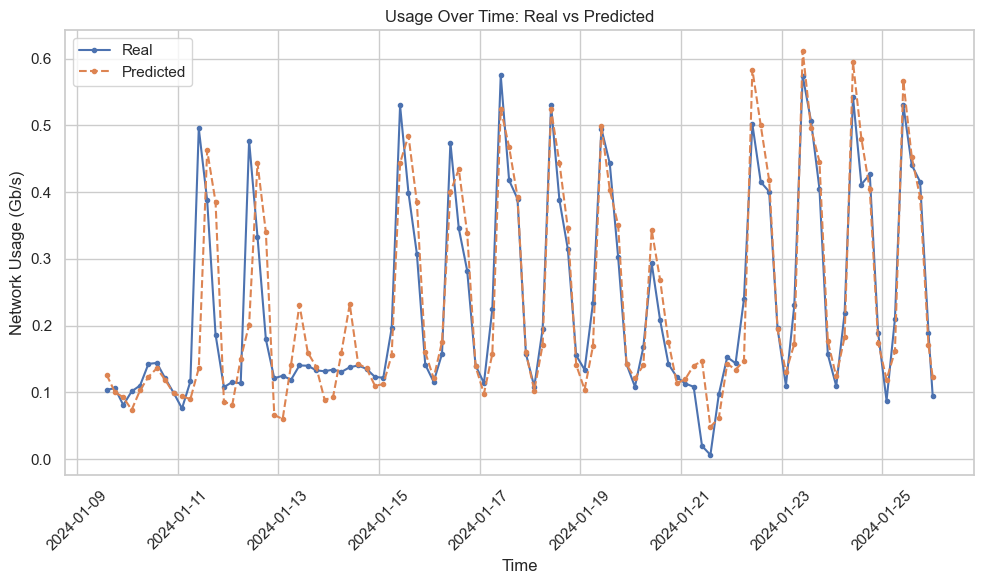

In [25]:
# Visualization of the Predictions vs Real Values
plt.figure(figsize=(10, 6))
plt.plot(timestamps_test[-100:], y_test[-100:], label='Real', marker='.')
plt.plot(timestamps_test[-100:], predictions[-100:], label='Predicted', linestyle='--', marker='.')
plt.title('Usage Over Time: Real vs Predicted')
plt.xlabel('Time')
plt.ylabel('Network Usage (Gb/s)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Ensure the labels fit within the figure area
plt.show()

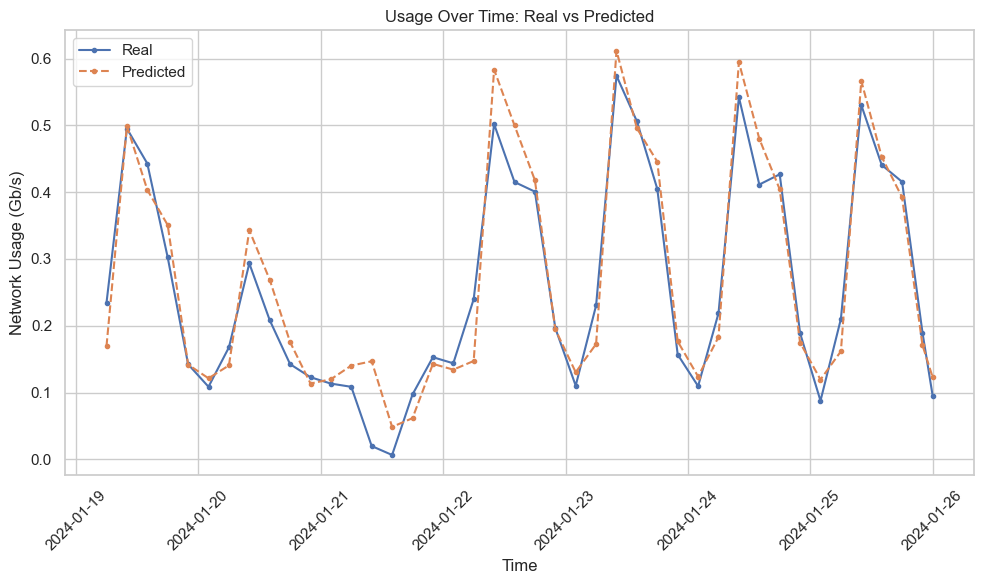

In [26]:
# Visualization of the Predictions vs Real Values
plt.figure(figsize=(10, 6))
plt.plot(timestamps_test[-42:], y_test[-42:], label='Real', marker='.')
plt.plot(timestamps_test[-42:], predictions[-42:], label='Predicted', linestyle='--', marker='.')
plt.title('Usage Over Time: Real vs Predicted')
plt.xlabel('Time')
plt.ylabel('Network Usage (Gb/s)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Ensure the labels fit within the figure area
plt.show()

In [27]:
model

<Sequential name=sequential, built=True>

In [28]:
model.summary()|

SyntaxError: invalid syntax (<ipython-input-28-6499875ce58e>, line 1)

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 42, 100)        │        41,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 42, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,355 (837.33 KB)

 Trainable params: 71,451 (279.11 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,904 (558.22 KB)

In [30]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0056 - val_loss: 0.0065
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - val_loss: 0.0055
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0054 - val_loss: 0.0056
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0052 - val_loss: 0.0055
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - val_loss: 0.0056
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0051 - val_loss: 0.0056
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0051 - val_loss: 0.0054
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0051 - val_loss: 0.0058
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0052 - val_loss: 0.0057
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

In [31]:
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


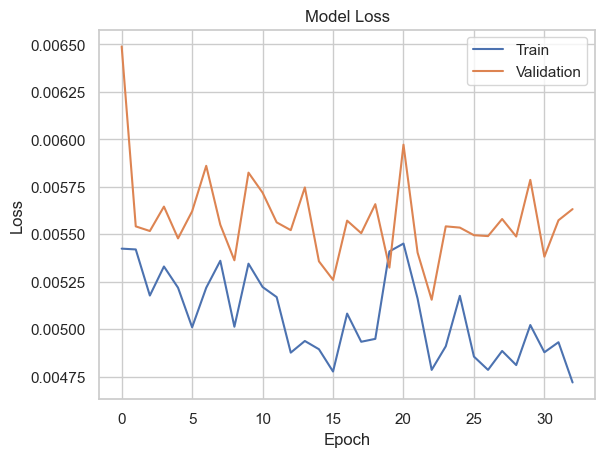

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [33]:
## Define callbacks

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True
)

# Model checkpoint
model_checkpoint = ModelCheckpoint(
    'best_model1.keras',
    monitor='val_loss',
    save_best_only=True,
    # save_weights_only=False,
    # mode='min'
)

In [34]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0048 - val_loss: 0.0053
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - val_loss: 0.0059
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - val_loss: 0.0054
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - val_loss: 0.0054
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0047 - val_loss: 0.0057
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - val_loss: 0.0055
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0048 - val_loss: 0.0056
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0047 - val_loss: 0.0055
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0044 - val_loss: 0.0055
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0047 - val_loss: 0.0058
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.002

In [35]:
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


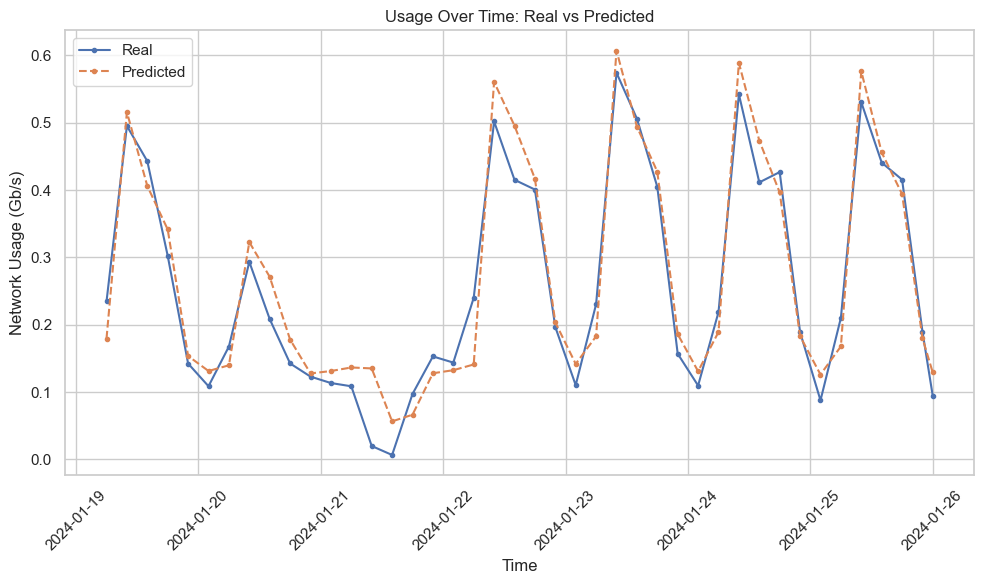

In [36]:
# Visualization of the Predictions vs Real Values
plt.figure(figsize=(10, 6))
plt.plot(timestamps_test[-42:], y_test[-42:], label='Real', marker='.')
plt.plot(timestamps_test[-42:], predictions[-42:], label='Predicted', linestyle='--', marker='.')
plt.title('Usage Over Time: Real vs Predicted')
plt.xlabel('Time')
plt.ylabel('Network Usage (Gb/s)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Ensure the labels fit within the figure area
plt.show()

In [37]:
# Calculate and pritn error metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mae) # Correct RMSE calculation

print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)

Mean Absolute Error 0.03091548759949355
Mean Squared Error 0.00234527876124295
Root Mean Squared Error 0.17582800573143503


In [38]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=64,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0047 - val_loss: 0.0053
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - val_loss: 0.0056
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - val_loss: 0.0053
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - val_loss: 0.0064
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0050 - val_loss: 0.0052
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0046 - val_loss: 0.0055
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0051 - val_loss: 0.0053
Epoch 8/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0047 - val_loss: 0.0052
Epoch 9/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0051 - val_loss: 0.0052
Epoch 10/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0047 - val_loss: 0.0059
Epoch 11/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - val_loss: 0.0056
Epoch 12/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

In [39]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=64,
    verbose=1
)

test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0047 - val_loss: 0.0054
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0051 - val_loss: 0.0056
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048 - val_loss: 0.0053
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0049 - val_loss: 0.0063
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - val_loss: 0.0055
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0046 - val_loss: 0.0053
Epoch 8/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0046 - val_loss: 0.0055
Epoch 9/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0046 - val_loss: 0.0056
Epoch 10/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0049 - val_loss: 0.0055
Epoch 11/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0046 - val_loss: 0.0053
Epoch 12/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

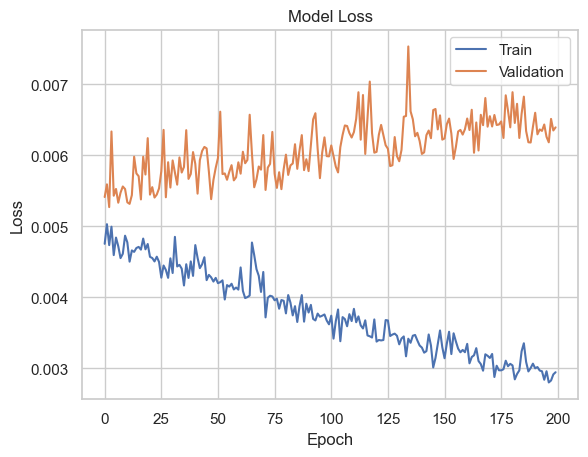

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [41]:
# Calculate and pritn error metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mae) # Correct RMSE calculation

print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)

Mean Absolute Error 0.03091548759949355
Mean Squared Error 0.00234527876124295
Root Mean Squared Error 0.17582800573143503


In [42]:
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [43]:
# Calculate and pritn error metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mae) # Correct RMSE calculation

print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)

Mean Absolute Error 0.031648262069570506
Mean Squared Error 0.002579775134126926
Root Mean Squared Error 0.17789958423102203
